In [32]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

1. Experiment with the number of hidden neurons in our simple neural network model, as well as the learning rate. <br>

    1. What changes result in more linear output from the model? <br>
        The model is more linear when both learning rate or neurons are lower <br>

    2. Can you get the model to obviously overfit the data? <br>
        It seems if we train data with more neurons and high learning rate, the model easily overfits <br>
        Although, strangely if learning rate is 1, then sometimes the model will underfit <br>

2. The third-hardest problem in physics is finding a proper wine to celebrate discoveries. Load the wine data from chapter 4, and create a new model with the appropriate number of input parameters. <br>

    1. How long does it take to train compared to the temperature data we have been using? <br>
        Definitely takes much longer because we have more features and I also trained on a bigger network <br>

    2. Can you explain what factors contribute to the training times? <br>
        More features means expanded dimensionality and also bigger network means more parameters to tune up <br>

    3. Can you get the loss to decrease while training on this dataset? <br>
        Yes, particularly by adjusting leanring rate. Although, it can overfit very quickly  <br>

    4. How would you go about graphing this dataset? <br>
        One way woud be to graph each feature separately with target. We could also graph actual vs target.
        Other way would be to use dimensionaliy reduction. <br>



In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 4,  9,  7,  6,  3,  2, 10,  1,  8]), tensor([0, 5]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [114]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val, verbose='short'):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if verbose == 'short':
            if epoch % 500 == 0:
                print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
        elif verbose == 'long':
            if epoch <= 5 or epoch % 500 == 0:
                print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [22]:
n_neurons = [1, 3, 7, 15, 25, 75, 500, 5000, 7500]
models = {}
loss_fn = nn.MSELoss()

for n_neuron in n_neurons:
    models[str(n_neuron)] = nn.Sequential(nn.Linear(1, n_neuron),
                                     nn.Tanh(),
                                     nn.Linear(n_neuron, 1))
    
    optimizer = optim.Adam(models[str(n_neuron)].parameters(), 1e-2)
    print(f'Model: {n_neuron}')
    training_loop(  
                    2000,
                    optimizer,
                    models[str(n_neuron)],
                    loss_fn,
                    t_un_train, t_un_val,
                    t_c_train, t_c_val
                    )
    print('\n')


Model: 1
Epoch 500, Training loss 68.8210, Validation loss 6.1970
Epoch 1000, Training loss 30.8701, Validation loss 0.1452
Epoch 1500, Training loss 16.7270, Validation loss 0.8398
Epoch 2000, Training loss 10.0290, Validation loss 1.0799


Model: 3
Epoch 500, Training loss 30.9046, Validation loss 4.4194
Epoch 1000, Training loss 9.1008, Validation loss 2.1685
Epoch 1500, Training loss 3.7526, Validation loss 2.2294
Epoch 2000, Training loss 2.1898, Validation loss 1.7768


Model: 7
Epoch 500, Training loss 8.3884, Validation loss 0.7819
Epoch 1000, Training loss 2.1347, Validation loss 3.0898
Epoch 1500, Training loss 1.6185, Validation loss 2.9100
Epoch 2000, Training loss 1.4561, Validation loss 3.0953


Model: 15
Epoch 500, Training loss 2.4698, Validation loss 3.3331
Epoch 1000, Training loss 1.5964, Validation loss 3.5635
Epoch 1500, Training loss 1.4075, Validation loss 3.5399
Epoch 2000, Training loss 1.2931, Validation loss 3.7760


Model: 25
Epoch 500, Training loss 2.0467,

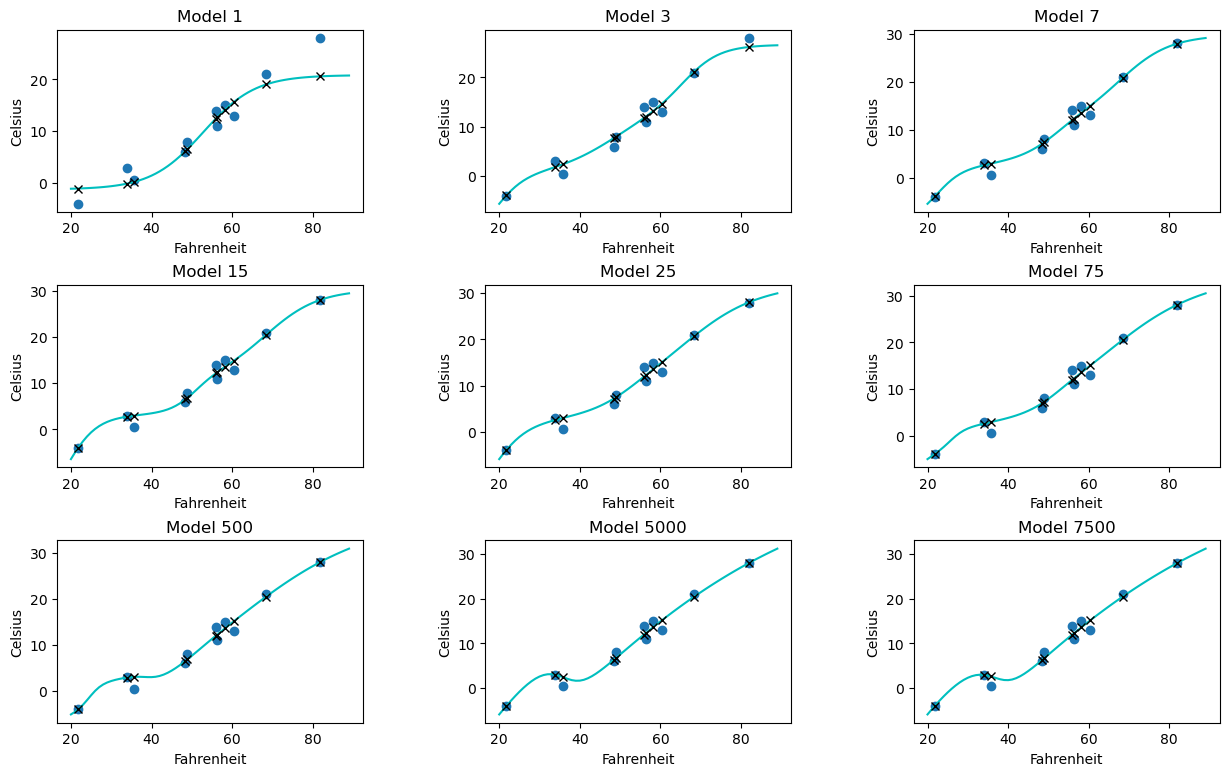

In [23]:
import torch
from matplotlib import pyplot as plt
import torch.nn as nn


t_range = torch.arange(20., 90.).unsqueeze(1)

fig, axs = plt.subplots(3, 3, figsize=(15, 9)) 
fig.subplots_adjust(hspace=0.4, wspace=0.4) 


for i, (key, model) in enumerate(models.items()):
    row = i // 3  
    col = i % 3 
    axs[row, col].set_title(f"Model {key}")
    axs[row, col].set_xlabel("Fahrenheit")
    axs[row, col].set_ylabel("Celsius")
    axs[row, col].plot(t_u.numpy(), t_c.numpy(), 'o')
    axs[row, col].plot(t_range.numpy(), model(0.1 * t_range).detach().numpy(), 'c-')
    axs[row, col].plot(t_u.numpy(), model(0.1 * t_u).detach().numpy(), 'kx')

for j in range(i + 1, 9):
    fig.delaxes(axs[j // 3, j % 3])

plt.show()


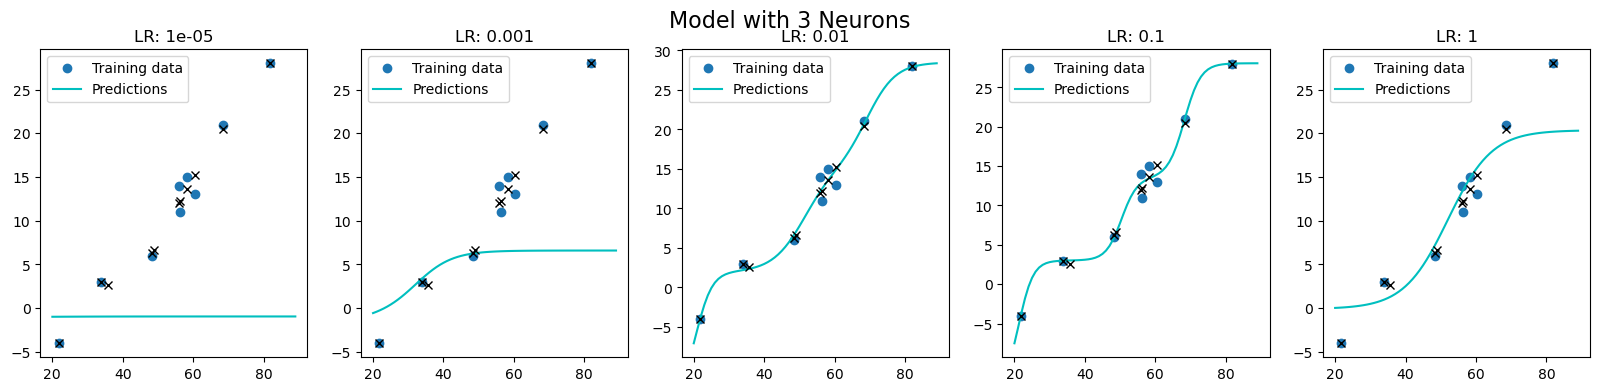

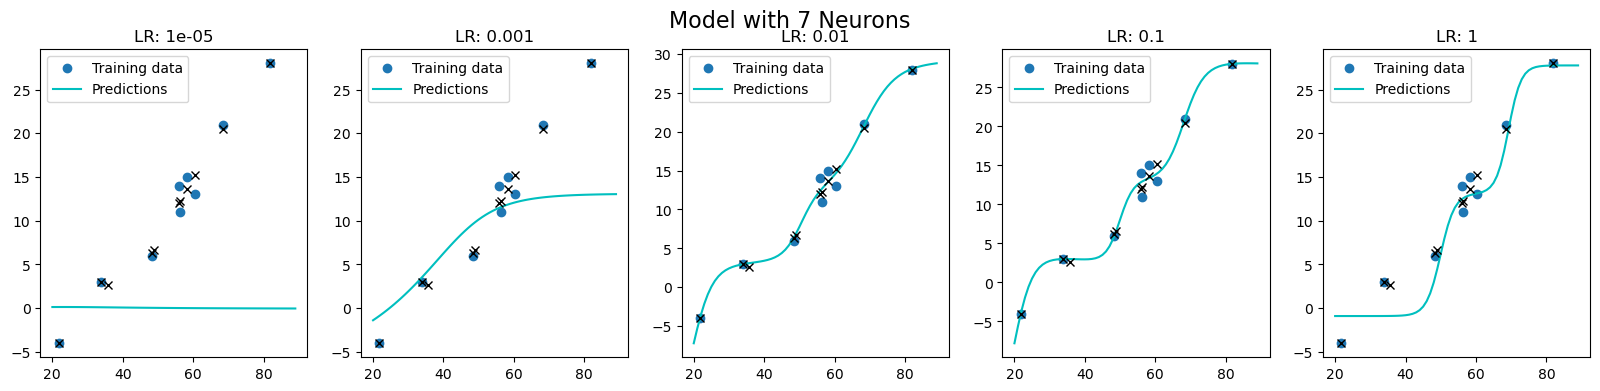

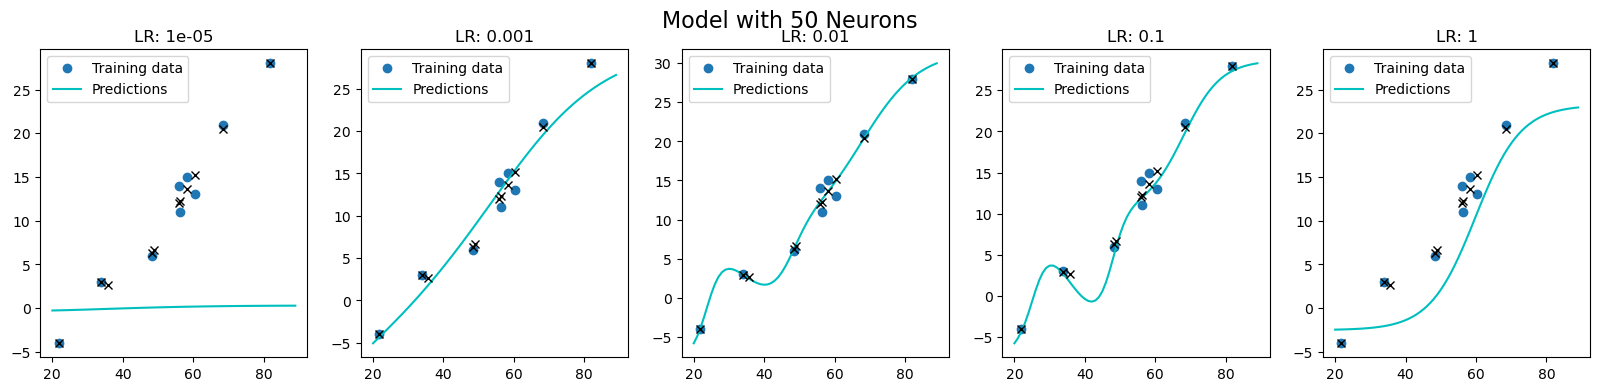

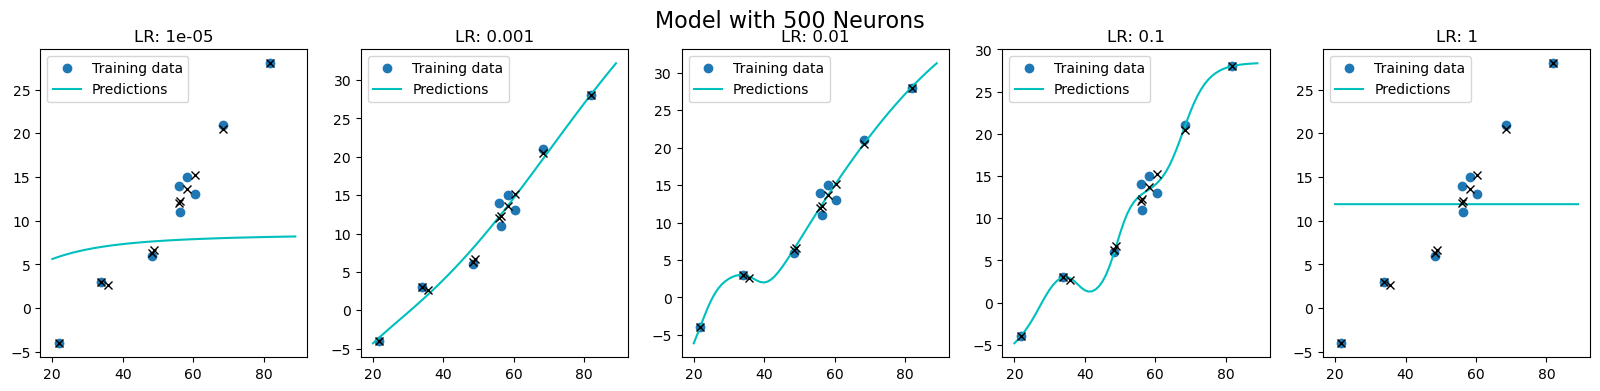

In [31]:
n_neurons = [3, 7, 50, 500]
learning_rates = [1e-5, 1e-3, 1e-2, 0.1, 1]
models = {}

t_range = torch.arange(20., 90.).unsqueeze(1)

for n_neuron in n_neurons:
    models[str(n_neuron)] = nn.Sequential(nn.Linear(1, n_neuron),
                                          nn.Tanh(),
                                          nn.Linear(n_neuron, 1))
    
    fig, axs = plt.subplots(1, len(learning_rates), figsize=(20, 4))
    fig.suptitle(f'Model with {n_neuron} Neurons', fontsize=16)
    
    for i, lr in enumerate(learning_rates):
        optimizer = optim.Adam(models[str(n_neuron)].parameters(), lr)
        
        training_loop(2000, optimizer, models[str(n_neuron)], loss_fn, t_un_train, t_un_val, t_c_train, t_c_val, verbose=False)

        axs[i].set_title(f'LR: {lr}')
        axs[i].plot(t_u_train.numpy(), t_c_train.numpy(), 'o', label='Training data')
        axs[i].plot(t_range.numpy(), models[str(n_neuron)](0.1 * t_range).detach().numpy(), 'c-', label='Predictions')
        axs[i].plot(t_u.numpy(), model(0.1 * t_u).detach().numpy(), 'kx')
        axs[i].legend()
        
    plt.show()


### Wine dataset

In [35]:
data_dir = '../data/p1ch4/tabular-wine/winequality-white.csv'

wine_np = np.loadtxt(data_dir, delimiter=';', skiprows=1)

In [38]:
wine_t = torch.from_numpy(wine_np)
wine_t

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  0.4500,  8.8000,  6.0000],
        [ 6.3000,  0.3000,  0.3400,  ...,  0.4900,  9.5000,  6.0000],
        [ 8.1000,  0.2800,  0.4000,  ...,  0.4400, 10.1000,  6.0000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  0.4600,  9.4000,  6.0000],
        [ 5.5000,  0.2900,  0.3000,  ...,  0.3800, 12.8000,  7.0000],
        [ 6.0000,  0.2100,  0.3800,  ...,  0.3200, 11.8000,  6.0000]],
       dtype=torch.float64)

In [109]:
features = wine_t[:, :-1].to(dtype=torch.float32)
target = wine_t[:, -1].to(dtype=torch.int64)

features.shape, target.shape

(torch.Size([4898, 11]), torch.Size([4898]))

In [110]:
features.dtype, target.dtype

(torch.float32, torch.int64)

In [111]:
n_samples = int(features.shape[0])
n_val = int(0.2 * n_samples)

shuffled_idx = torch.randperm(n_samples)
train_idx = shuffled_idx[:-n_val]
val_idx = shuffled_idx [-n_val:]

train_features = features[train_idx]
train_target = target[train_idx]

val_features = features[val_idx]
val_target = target[val_idx]

train_features_normed = 0.1 * train_features
val_features_normed = 0.1 * val_features

train_features_normed.shape, val_features_normed.shape

(torch.Size([3919, 11]), torch.Size([979, 11]))

In [121]:
wine_classifier = nn.Sequential(
    nn.Linear(11, 150),
    nn.ReLU(),
    nn.Linear(150, 300),
    nn.ReLU(),
    nn.Linear(300, 10),
)

wine_classifier

Sequential(
  (0): Linear(in_features=11, out_features=150, bias=True)
  (1): ReLU()
  (2): Linear(in_features=150, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=10, bias=True)
)

In [123]:
loss_fn_w = nn.CrossEntropyLoss()
optimizer_w = optim.Adam(wine_classifier.parameters(), 1e-4)

training_loop(  
                    5000,
                    optimizer_w,
                    wine_classifier,
                    loss_fn_w,
                    train_features_normed, val_features_normed,
                    train_target, val_target,
                    verbose = 'long'
                    )

Epoch 1, Training loss 1.1858, Validation loss 1.1930
Epoch 2, Training loss 1.1855, Validation loss 1.1929
Epoch 3, Training loss 1.1867, Validation loss 1.1928
Epoch 4, Training loss 1.1851, Validation loss 1.1927
Epoch 5, Training loss 1.1858, Validation loss 1.1941
Epoch 500, Training loss 1.0987, Validation loss 1.1145
Epoch 1000, Training loss 1.0650, Validation loss 1.0939
Epoch 1500, Training loss 1.0477, Validation loss 1.0889
Epoch 2000, Training loss 1.0320, Validation loss 1.0839
Epoch 2500, Training loss 1.0171, Validation loss 1.0819
Epoch 3000, Training loss 1.0027, Validation loss 1.0809
Epoch 3500, Training loss 0.9895, Validation loss 1.0798
Epoch 4000, Training loss 0.9779, Validation loss 1.0820
Epoch 4500, Training loss 0.9682, Validation loss 1.0853
Epoch 5000, Training loss 0.9594, Validation loss 1.0886
